### 1. Importación de librerías y carga de datos ###

Importación de librerías

In [54]:
# Importar librerías necesarias

import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer

warnings.filterwarnings('ignore')






Carga y preprocesamiento de datos

In [55]:
# Cargar el archivo CSV sin encabezados
df = pd.read_csv(r"C:\Users\Usuari\Documents\IRONHACK\Work\Labs\Proyecto_midterm\Clasificacion\data_mid_bootcamp_project_classification\creditcardmarketing.csv", header=None)

# Asignar nombres de columnas
column_names = ['Customer Number', 'Offer Accepted', 'Reward', 'Mailer Type', 'Income Level', 'Bank Accounts Open', 
                'Overdraft Protection', 'Credit Rating', 'Credit Cards Held', 'Homes Owned', 'Household Size', 
                'Own Your Home', 'Average Balance', 'Q1 Balance', 'Q2 Balance', 'Q3 Balance', 'Q4 Balance']
df.columns = column_names

# Descripción inicial de los datos
print(df.head())
print(df.describe())
print(df.info())

# Comprobar valores nulos
print(df.isnull().sum())


   Customer Number Offer Accepted     Reward Mailer Type Income Level  \
0                1             No  Air Miles      Letter         High   
1                2             No  Air Miles      Letter       Medium   
2                3             No  Air Miles    Postcard         High   
3                4             No  Air Miles      Letter       Medium   
4                5             No  Air Miles      Letter       Medium   

   Bank Accounts Open Overdraft Protection Credit Rating  Credit Cards Held  \
0                   1                   No          High                  2   
1                   1                   No        Medium                  2   
2                   2                   No        Medium                  2   
3                   2                   No          High                  1   
4                   1                   No        Medium                  2   

   Homes Owned  Household Size Own Your Home  Average Balance  Q1 Balance  \
0        

### 2. Análisis Exploratorio de Datos (EDA) ###
Objetivo: Entender las características de los datos, tanto categóricas como numéricas, y preparar visualizaciones básicas.

Distribución de la variable objetivo: Analizar la variable objetivo 'Offer Accepted'.

Análisis de variables categóricas: Visualizar la distribución de cada variable categórica.

Análisis de variables numéricas: Visualizar la distribución y detectar outliers en las variables numéricas.

Matriz de correlación: Entender las relaciones entre variables numéricas.

Análisis de la variable objetivo

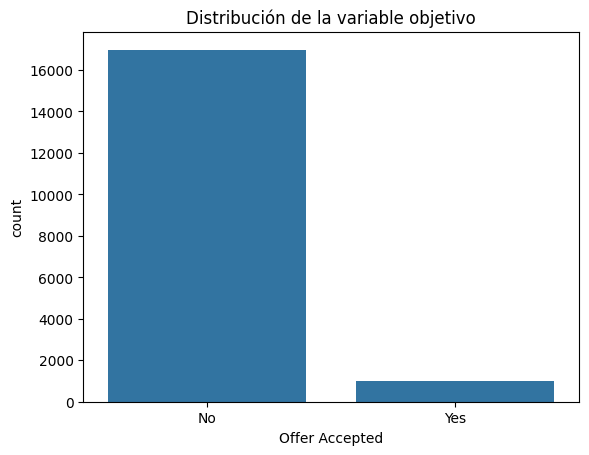

In [56]:
# análisis de la variable objetivo

sns.countplot(x='Offer Accepted', data=df)
plt.title('Distribución de la variable objetivo')
plt.show()


Análisis de las variables categóricas

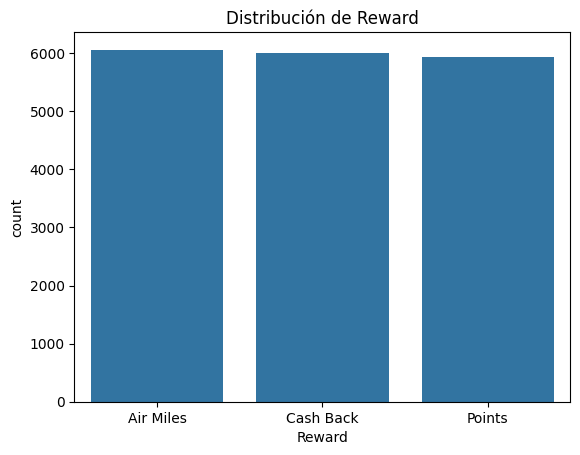

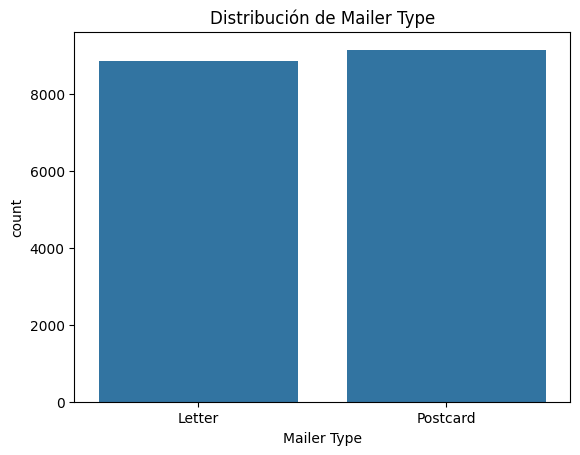

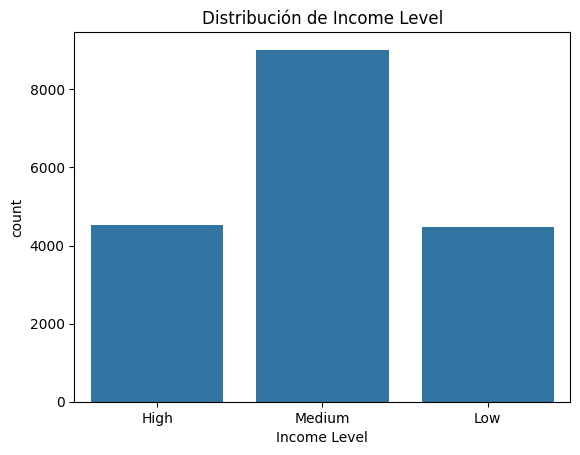

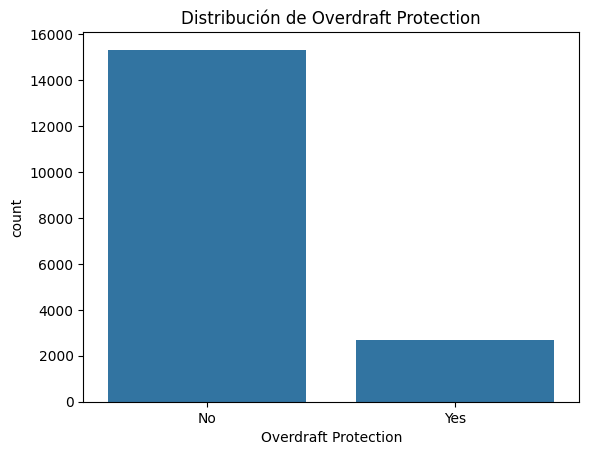

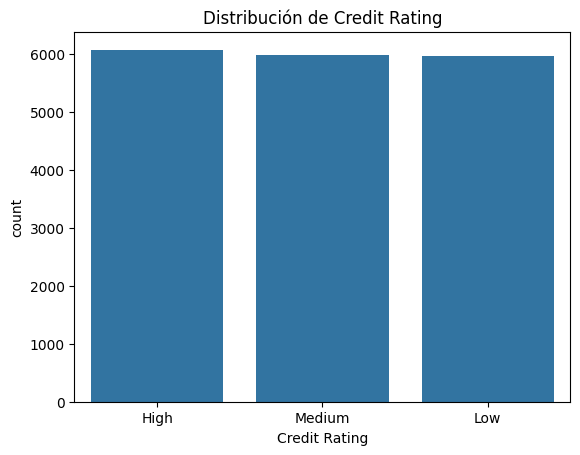

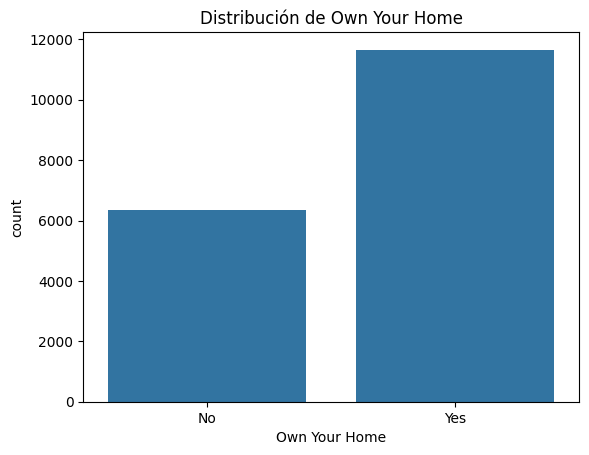

In [57]:
# análisis de las variables categóricas

categorical_vars = ['Reward', 'Mailer Type', 'Income Level', 'Overdraft Protection', 'Credit Rating', 'Own Your Home']
for var in categorical_vars:
    sns.countplot(x=var, data=df)
    plt.title(f'Distribución de {var}')
    plt.show()


Análisis de las variables numéricas

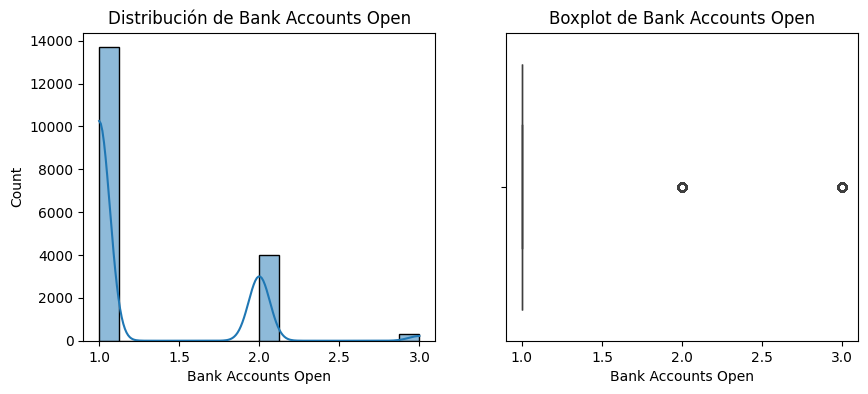

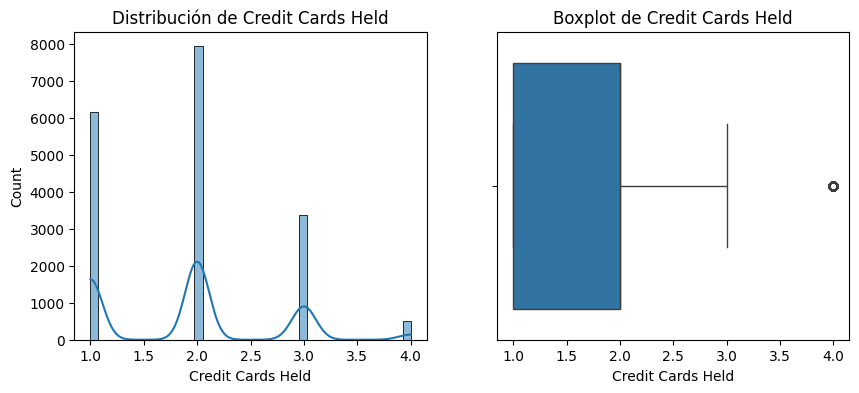

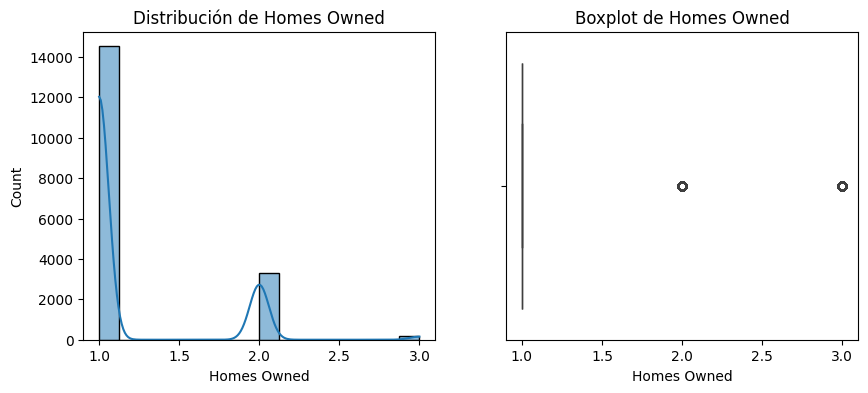

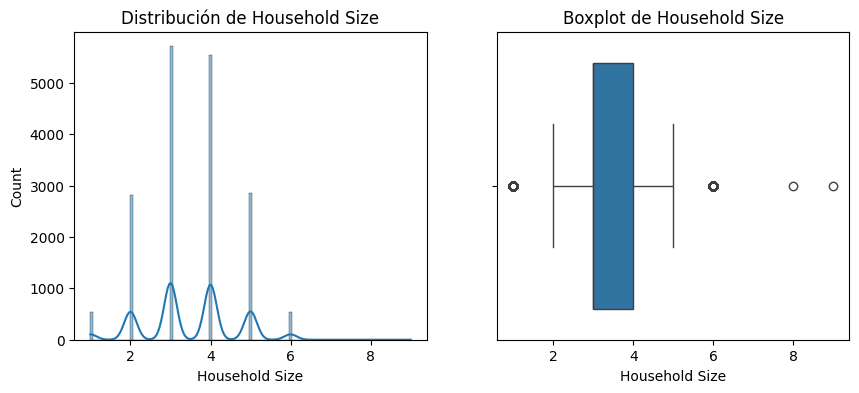

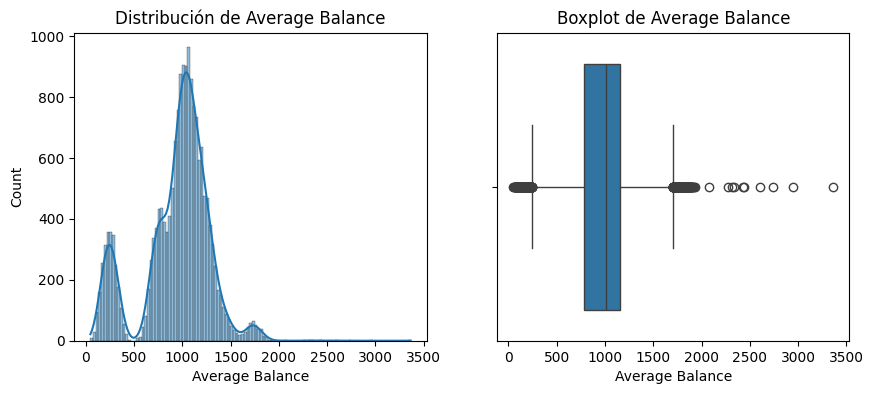

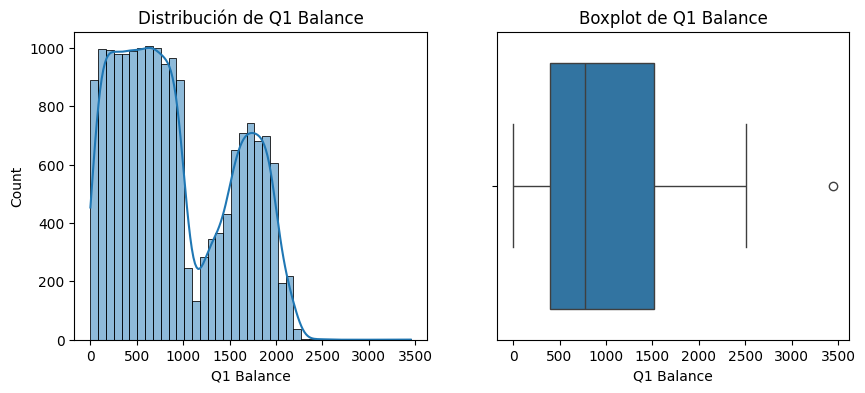

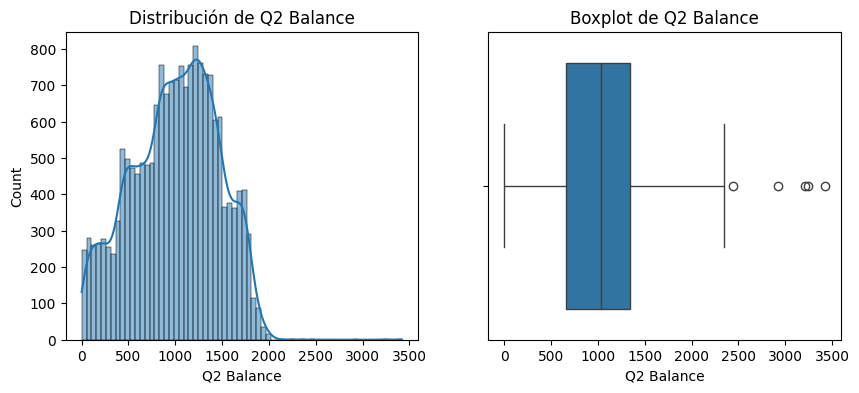

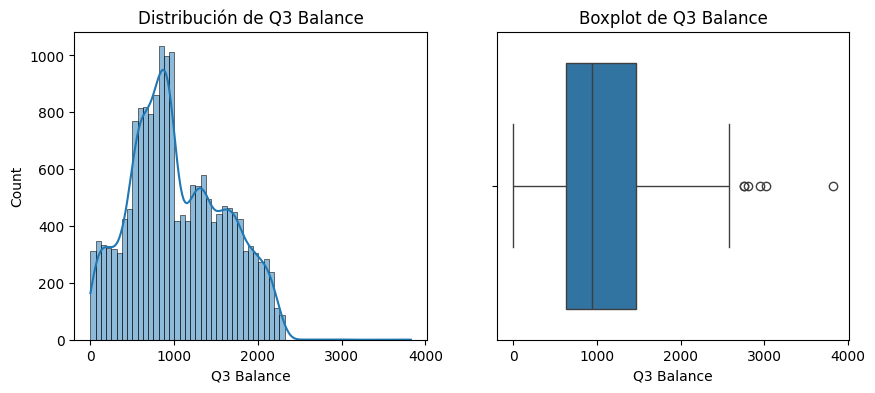

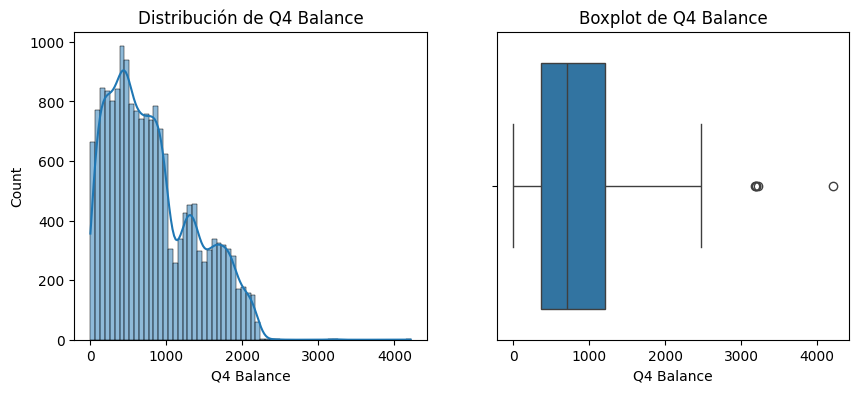

In [58]:
# análisis de las variables numéricas

numerical_vars = ['Bank Accounts Open', 'Credit Cards Held', 'Homes Owned', 'Household Size', 'Average Balance', 'Q1 Balance', 'Q2 Balance', 'Q3 Balance', 'Q4 Balance']
for var in numerical_vars:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribución de {var}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot de {var}')
    plt.show()


Matriz de correlación

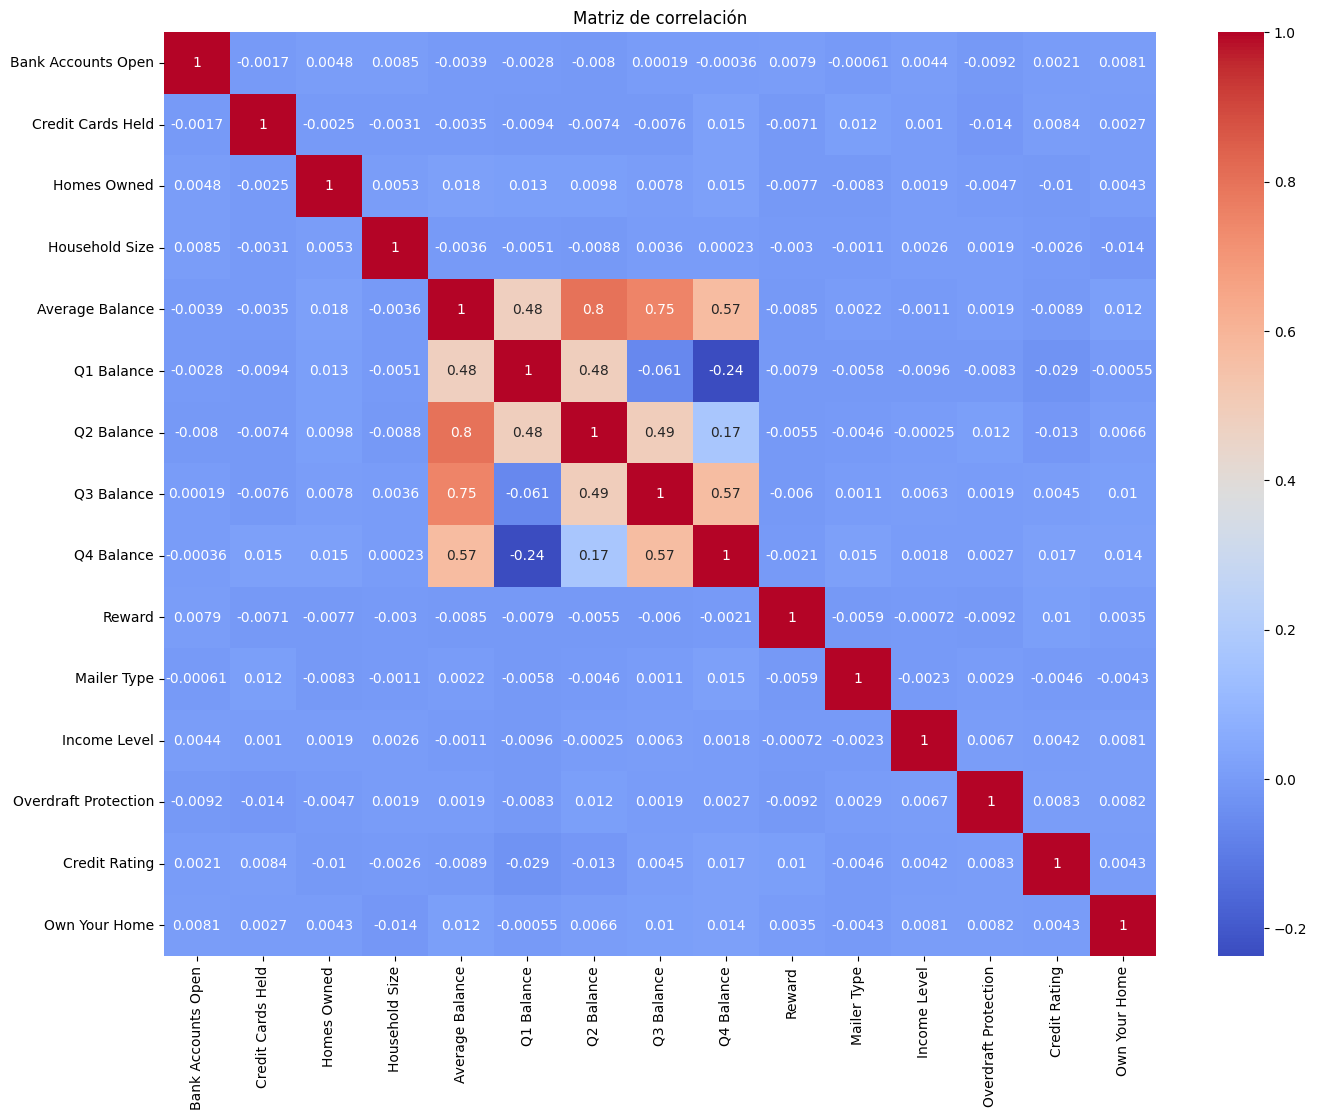

In [59]:
# matriz de correlación

# Convertir variables categóricas a numéricas
df_encoded = df.copy()
for var in categorical_vars:
    df_encoded[var] = df_encoded[var].astype('category').cat.codes

# Filtrar solo las columnas numéricas
df_encoded = df_encoded[numerical_vars + [var for var in categorical_vars if var in df_encoded.columns]]

# Calcular la matriz de correlación solo para las variables numéricas
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()


### 3. Preparación de datos ###


Hemos encontrado que en algunas variables hay outliers que pueden afectar a la calidad del estudio, así que vamos a tratarlos

In [60]:
# Identificar y tratar outliers usando el método de IQR o transformaciones
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

numerical_vars = ['Bank Accounts Open', 'Credit Cards Held', 'Homes Owned', 'Household Size', 'Average Balance', 'Q1 Balance', 'Q2 Balance', 'Q3 Balance', 'Q4 Balance']

for var in numerical_vars:
    handle_outliers(df_encoded, var)


In [61]:
# Verificar las columnas del DataFrame original
print(df.columns)

# Codificar variables categóricas incluyendo 'Offer Accepted'
df_encoded = df.copy()
categorical_vars = ['Offer Accepted', 'Reward', 'Mailer Type', 'Income Level', 'Overdraft Protection', 'Credit Rating', 'Own Your Home']
for var in categorical_vars:
    df_encoded[var] = df_encoded[var].astype('category').cat.codes

# Verificar que la columna 'Offer Accepted' esté en df_encoded
print(df_encoded.columns)

# Verificar la codificación de la columna 'Offer Accepted'
print(df_encoded['Offer Accepted'].unique())

# Dividir los datos en características (X) y variable objetivo (y)
X = df_encoded.drop('Offer Accepted', axis=1)
y = df_encoded['Offer Accepted']

# Dividir los datos en conjuntos de entrenamiento y prueba


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Mostrar formas de los conjuntos de datos resultantes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Index(['Customer Number', 'Offer Accepted', 'Reward', 'Mailer Type',
       'Income Level', 'Bank Accounts Open', 'Overdraft Protection',
       'Credit Rating', 'Credit Cards Held', 'Homes Owned', 'Household Size',
       'Own Your Home', 'Average Balance', 'Q1 Balance', 'Q2 Balance',
       'Q3 Balance', 'Q4 Balance'],
      dtype='object')
Index(['Customer Number', 'Offer Accepted', 'Reward', 'Mailer Type',
       'Income Level', 'Bank Accounts Open', 'Overdraft Protection',
       'Credit Rating', 'Credit Cards Held', 'Homes Owned', 'Household Size',
       'Own Your Home', 'Average Balance', 'Q1 Balance', 'Q2 Balance',
       'Q3 Balance', 'Q4 Balance'],
      dtype='object')
[0 1]
X_train shape: (14400, 16)
X_test shape: (3600, 16)
y_train shape: (14400,)
y_test shape: (3600,)


### 4. Construcción y evaluación de modelos ###

Hemoe encontrado que hay NaNs, así que vamos a intentar solucionarlo:

In [62]:
# Verificar valores faltantes en el conjunto de datos escalado
print("Valores faltantes en el conjunto de entrenamiento:")
print(pd.DataFrame(X_train_scaled).isnull().sum())
print("Valores faltantes en el conjunto de prueba:")
print(pd.DataFrame(X_test_scaled).isnull().sum())


Valores faltantes en el conjunto de entrenamiento:
0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11    16
12    16
13    16
14    16
15    16
dtype: int64
Valores faltantes en el conjunto de prueba:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    8
12    8
13    8
14    8
15    8
dtype: int64


In [63]:

# Inicializar el imputador
imputer = SimpleImputer(strategy='mean')  

# Imputar valores faltantes en el conjunto de entrenamiento
X_train_imputed = imputer.fit_transform(X_train_scaled)

# Imputar valores faltantes en el conjunto de prueba
X_test_imputed = imputer.transform(X_test_scaled)

# Verificar que no haya valores faltantes después de la imputación
print("Valores faltantes después de la imputación en el conjunto de entrenamiento:")
print(pd.DataFrame(X_train_imputed).isnull().sum())
print("Valores faltantes después de la imputación en el conjunto de prueba:")
print(pd.DataFrame(X_test_imputed).isnull().sum())


Valores faltantes después de la imputación en el conjunto de entrenamiento:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64
Valores faltantes después de la imputación en el conjunto de prueba:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64


Regresión logística

In [64]:
# Inicializar el modelo de Regresión Logística
logreg = LogisticRegression(random_state=42)

# Entrenar el modelo
logreg.fit(X_train_imputed, y_train)

# Hacer predicciones
y_pred_train_logreg = logreg.predict(X_train_imputed)
y_pred_test_logreg = logreg.predict(X_test_imputed)

# Evaluar el modelo
train_accuracy_logreg = accuracy_score(y_train, y_pred_train_logreg)
test_accuracy_logreg = accuracy_score(y_test, y_pred_test_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_test_logreg)
class_report_logreg = classification_report(y_test, y_pred_test_logreg)

print("Regresión Logística:")
print(f"Exactitud en entrenamiento: {train_accuracy_logreg}")
print(f"Exactitud en prueba: {test_accuracy_logreg}")
print("Matriz de confusión:")
print(conf_matrix_logreg)
print("Reporte de clasificación:")
print(class_report_logreg)



Regresión Logística:
Exactitud en entrenamiento: 0.94375
Exactitud en prueba: 0.9408333333333333
Matriz de confusión:
[[3387    0]
 [ 213    0]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3387
           1       0.00      0.00      0.00       213

    accuracy                           0.94      3600
   macro avg       0.47      0.50      0.48      3600
weighted avg       0.89      0.94      0.91      3600



KNN

In [65]:
# Inicializar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo
knn.fit(X_train_imputed, y_train)

# Hacer predicciones
y_pred_train_knn = knn.predict(X_train_imputed)
y_pred_test_knn = knn.predict(X_test_imputed)

# Evaluar el modelo
train_accuracy_knn = accuracy_score(y_train, y_pred_train_knn)
test_accuracy_knn = accuracy_score(y_test, y_pred_test_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_test_knn)
class_report_knn = classification_report(y_test, y_pred_test_knn)

print("K-Nearest Neighbors:")
print(f"Exactitud en entrenamiento: {train_accuracy_knn}")
print(f"Exactitud en prueba: {test_accuracy_knn}")
print("Matriz de confusión:")
print(conf_matrix_knn)
print("Reporte de clasificación:")
print(class_report_knn)


K-Nearest Neighbors:
Exactitud en entrenamiento: 0.9457638888888888
Exactitud en prueba: 0.9372222222222222
Matriz de confusión:
[[3373   14]
 [ 212    1]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3387
           1       0.07      0.00      0.01       213

    accuracy                           0.94      3600
   macro avg       0.50      0.50      0.49      3600
weighted avg       0.89      0.94      0.91      3600



Árbol de decisión

In [66]:

# Inicializar el modelo de Árbol de Decisión
tree = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
tree.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred_train_tree = tree.predict(X_train_scaled)
y_pred_test_tree = tree.predict(X_test_scaled)

# Evaluar el modelo
train_accuracy_tree = accuracy_score(y_train, y_pred_train_tree)
test_accuracy_tree = accuracy_score(y_test, y_pred_test_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_test_tree)
class_report_tree = classification_report(y_test, y_pred_test_tree)

print("Árbol de Decisión:")
print(f"Exactitud en entrenamiento: {train_accuracy_tree}")
print(f"Exactitud en prueba: {test_accuracy_tree}")
print("Matriz de confusión:")
print(conf_matrix_tree)
print("Reporte de clasificación:")
print(class_report_tree)


Árbol de Decisión:
Exactitud en entrenamiento: 1.0
Exactitud en prueba: 0.8902777777777777
Matriz de confusión:
[[3182  205]
 [ 190   23]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3387
           1       0.10      0.11      0.10       213

    accuracy                           0.89      3600
   macro avg       0.52      0.52      0.52      3600
weighted avg       0.89      0.89      0.89      3600



Comparación de modelos

In [67]:

# Crear un DataFrame con los resultados
results = {
    'Modelo': ['Regresión Logística', 'K-Nearest Neighbors', 'Árbol de Decisión'],
    'Exactitud en Entrenamiento': [train_accuracy_logreg, train_accuracy_knn, train_accuracy_tree],
    'Exactitud en Prueba': [test_accuracy_logreg, test_accuracy_knn, test_accuracy_tree]
}

results_df = pd.DataFrame(results)
print(results_df)


                Modelo  Exactitud en Entrenamiento  Exactitud en Prueba
0  Regresión Logística                    0.943750             0.940833
1  K-Nearest Neighbors                    0.945764             0.937222
2    Árbol de Decisión                    1.000000             0.890278


#### Interpretación de los resultados ####

Regresión Logística

La regresión logística muestra un buen desempeño tanto en el conjunto de entrenamiento como en el de prueba, con una exactitud en prueba ligeramente inferior a la del entrenamiento. Esto indica que el modelo está generalizando bien los datos sin sobreajustarse.


K-Nearest Neighbors (KNN)

El modelo KNN también presenta un rendimiento similar al de la regresión logística, con una exactitud en prueba levemente inferior a la del conjunto de entrenamiento. Esto sugiere una buena generalización con un comportamiento cercano al de la regresión logística.


Árbol de Decisión

El árbol de decisión tiene una exactitud perfecta en el conjunto de entrenamiento, lo que indica un sobreajuste (overfitting) severo. Esto se confirma con la significativa caída en la exactitud del conjunto de prueba, que es considerablemente más baja que la de los otros dos modelos. El árbol de decisión está memorizando los datos de entrenamiento y no está generalizando bien.


Conclusiones

Mejor Modelo: Tanto la regresión logística como el KNN son modelos adecuados para este problema, mostrando un equilibrio entre precisión y generalización. Dado que ambos tienen un rendimiento similar, se podría optar por la regresión logística por su simplicidad y menor necesidad de ajuste de hiperparámetros en comparación con KNN.


Modelo con Peor Rendimiento: El árbol de decisión no es un buen candidato debido a su tendencia al sobreajuste, lo cual se refleja en la baja exactitud en el conjunto de prueba.

Validación cruzada:

In [68]:

# Regresión Logística con validación cruzada
logreg = LogisticRegression(random_state=42)
cv_scores_logreg = cross_val_score(logreg, X_train_imputed, y_train, cv=5)
print(f"CV exactitud Regresión Logística: {cv_scores_logreg.mean()}")

# K-Nearest Neighbors con validación cruzada
knn = KNeighborsClassifier(n_neighbors=5)
cv_scores_knn = cross_val_score(knn, X_train_imputed, y_train, cv=5)
print(f"CV exactitud KNN: {cv_scores_knn.mean()}")

# Árbol de Decisión con validación cruzada
tree = DecisionTreeClassifier(random_state=42)
cv_scores_tree = cross_val_score(tree, X_train_imputed, y_train, cv=5)
print(f"CV exactitud Árbol de Decisión: {cv_scores_tree.mean()}")


CV exactitud Regresión Logística: 0.94375
CV exactitud KNN: 0.9414583333333333
CV exactitud Árbol de Decisión: 0.8863194444444445


#### Interpretación de los resultados de la validación cruzada ####

Regresión Logística

La regresión logística mantiene una alta exactitud promedio de validación cruzada, similar a la obtenida durante el entrenamiento y la prueba. Esto confirma que el modelo está generalizando bien y no está sobreajustado a los datos de entrenamiento.


K-Nearest Neighbors (KNN)

El modelo KNN también muestra una alta exactitud promedio de validación cruzada, muy cercana a la de la regresión logística. Este modelo también está generalizando bien, lo cual es un buen indicativo de su robustez.


Árbol de Decisión

El árbol de decisión, aunque mejora ligeramente su exactitud promedio con la validación cruzada, sigue siendo inferior a la de los otros dos modelos. Esto refuerza la conclusión de que este modelo tiene una tendencia al sobreajuste y no generaliza tan bien.




### 5. Conclusiones Finales ###

Mejor Modelo: Tanto la regresión logística como el KNN son modelos adecuados para este problema, mostrando altos niveles de exactitud y buena capacidad de generalización. La elección final puede basarse en otros factores, como la interpretabilidad del modelo (a favor de la regresión logística) o la capacidad de manejar relaciones no lineales (a favor del KNN).

Modelo con Peor Rendimiento: El árbol de decisión sigue siendo el modelo con peor rendimiento debido a su menor capacidad de generalización.